In [1]:
# https://zhuanlan.zhihu.com/p/392350956
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
%matplotlib inline

### 生成测试数据，两类数据，用于分类

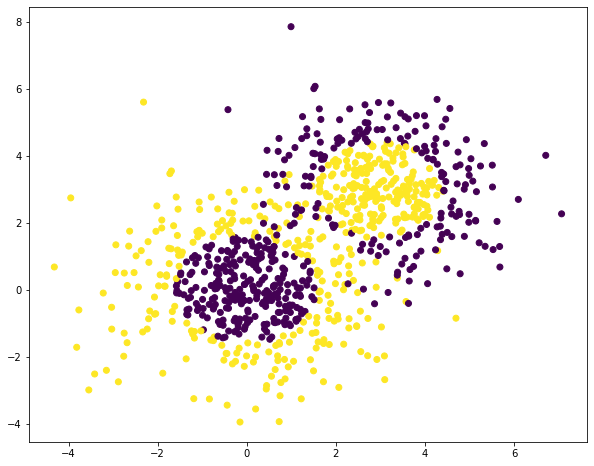

In [2]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2 
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2 
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#将两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

### 使用AdaBoostClassifier进行分类

In [3]:
ABC = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, min_samples_split=20,
    min_samples_leaf=5),
    algorithm="SAMME",
    n_estimators=200,
    learning_rate=0.8)

ABC.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20),
                   learning_rate=0.8, n_estimators=200)

### 展示分类效果

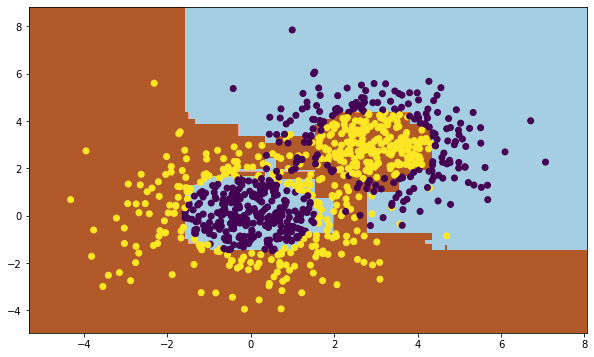

Score: 0.9133333333333333


In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                    np.arange(y_min, y_max, 0.02))
                    
Z = ABC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

print("Score:" , ABC.score(X,y))